In [3]:
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np
# pd.set_option("display.max_rows", None, "display.max_columns", None)

In [4]:
# create the raw dataframe from the CSV
raw_data = pd.read_csv("raw-2005-2019 (4).csv")
regions = pd.read_csv("Country divided by regions(world Bank).csv")

# Drop unsused columns and rename needed columns for region
regions = regions[["Region", "TableName"]]
regions = regions.rename(columns={"TableName" : "Country name"})

# Create the the dataframe being used for the gini index comparison 
gini_index = pd.merge(raw_data.dropna(), regions)
gini_index_2010 = gini_index.loc[gini_index["year"] == 2010]
gini_index_2015 = gini_index.loc[gini_index["year"] == 2015]

#Create main clean data without the GINI index
clean_data = raw_data.drop("GINI index (World Bank estimate)", 1)

#Get data for the 3 most recent years
clean_data = clean_data.loc[clean_data["year"] >= 2017]


merged_data = pd.merge(clean_data, regions, on = "Country name")

#### Add the countries that were left out 

In [5]:
# Create an empty list to store the values that are not found in the regions list
not_in_list = []

# Create a list for
regions_list = regions["Country name"].tolist()

for index, row in clean_data.iterrows():
      if row["Country name"] not in regions_list:
            not_in_list.append(row["Country name"])
# Drop the duplicates to see the countries excluded from the merge due to country name issues
not_in_list = list(dict.fromkeys(not_in_list))

#After i had the unique countries that did not get merged i checked the CSV file to see why.
#If it was in the CSV file but with a different name i updated the name in the CSV file to match our dataframe
#If the country was not in the CSV file i added the data by adding its name and appropriate region that matches the CSV (Laos and Palestinian Territories)

#Print len of list that contains valued not merged to make sure that no conutries from clean data set were left out and that they all received a region
print(len(not_in_list))

#print the len of your merged data and orginal dataframe to make sure they match just for good measures and all orginal data is represented
print(len(merged_renamed), len(clean_data))

0


NameError: name 'merged_renamed' is not defined

#### Filter data set to only include countries that have data for all 3 years

In [ ]:
#Get a working copy of the merged data to work with
loop_df = pd.DataFrame.copy(merged_renamed)
# loop_df = loop_df.loc[0:10]
#Set global variables
count = 0
country = ""
countries = []

# Create a for loop to get the countries that have data for all 3 years (2017 - 2019)
for index, row in loop_df.iterrows():
    if country != row["Country Name"]:
        country = row["Country Name"]
        count = 0
    elif country == row["Country Name"]:
        count += 1
        if count == 2:
            countries.append( row["Country Name"])

# Print the lenght of the countries with all 3 years and original data frame to see how many we are losing
print(len(countries))
print(len(loop_df["Country Name"].unique()))

#Get the new Dataframe that countries countries that have data for all 3 years
Final_df = loop_df.set_index("Country Name").loc[countries].reset_index()

#Check to see if lenght matches length of countries lists
Final_df["Country Name"].nunique()


#### Final Data sets

In [6]:
#Gini Data set 
gini_index
gini_index_2010
gini_index_2015

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),Region
22,Armenia,2015,4.348320,9.008449,0.722551,66.000000,0.551027,-0.186535,0.901462,0.594143,-0.394313,-0.210170,2.237644,0.514600,0.324,Europe & Central Asia
35,Austria,2015,7.076447,10.697696,0.928110,72.099998,0.900305,0.102583,0.557480,0.798263,1.263306,1.564229,1.762817,0.249110,0.305,Europe & Central Asia
46,Belarus,2015,5.718908,9.753776,0.924073,65.199997,0.622753,-0.095122,0.668678,0.583727,-0.677531,-0.650102,2.004021,0.350420,0.256,Europe & Central Asia
56,Belgium,2015,6.904219,10.641150,0.885209,71.400002,0.869475,0.064905,0.468785,0.805178,0.987267,1.440750,1.511811,0.218969,0.277,Europe & Central Asia
58,Benin,2015,3.624664,7.594453,0.434389,53.099998,0.733384,-0.003847,0.850098,0.592222,0.141303,-0.567374,2.048732,0.565220,0.478,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,Turkey,2015,5.514465,10.056709,0.851225,65.599998,0.653197,-0.017012,0.806076,0.460246,-0.930817,0.056615,2.530940,0.458964,0.429,Europe & Central Asia
628,Ukraine,2015,3.964543,8.917973,0.909440,63.700001,0.430592,-0.011267,0.952473,0.574076,-1.024300,-0.727938,1.956619,0.493530,0.255,Europe & Central Asia
638,United Kingdom,2015,6.515445,10.571567,0.935986,71.699997,0.832926,0.300925,0.456134,0.797785,0.907792,1.819708,1.753815,0.269178,0.332,Europe & Central Asia
651,Uruguay,2015,6.628080,9.900736,0.891493,68.699997,0.916880,-0.038354,0.673476,0.892661,1.073821,0.745666,2.191727,0.330673,0.402,Latin America & Caribbean


In [8]:
gini_index_2015 = gini_index_2015.rename(columns={"Life Ladder" : "Happiness Score"})

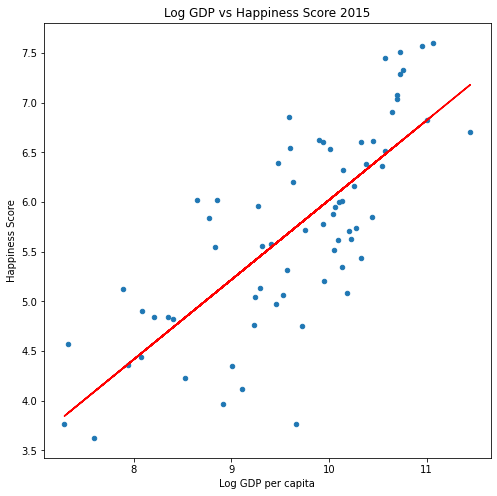

The r-value is 0.7619276931775727
The p-value is 1.859926888355187e-14


In [9]:
# Scatter plot for GDP vs. Happiness

#use pandas to plot a scatter plot
gini_index_2015.plot(kind="scatter", x="Log GDP per capita", y="Happiness Score", grid=False, figsize=(8,8),
              title="Log GDP vs Happiness Score 2015")

#Calculate the correlation coefficient
happiness = gini_index_2015.iloc[:, 2]
gdp = gini_index_2015.iloc[:, 3]
correlation = st.pearsonr(gdp, happiness)

#Calculate  the linear regression, r squared 
slope, intercept, rvalue, pvalue, stderr = st.linregress(gdp, happiness)
regress_values = gdp * slope + intercept

plt.plot(gdp,regress_values,"r-")

# Saves an image of our chart so that we can view it in a folder
#plt.savefig("../Images/temp_lat.png")
plt.show()
print("The r-value is " + str(rvalue))
print("The p-value is " + str(pvalue))

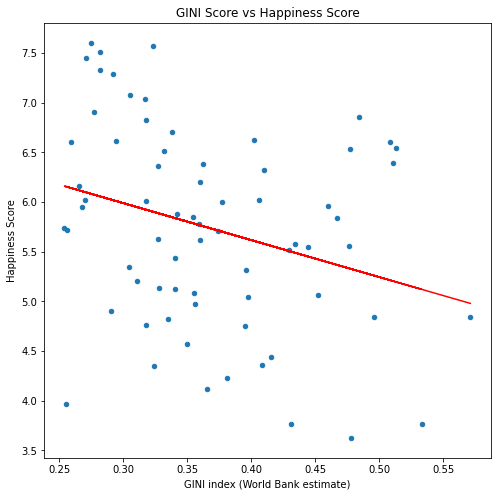

The r-value is -0.2917016957676174
The p-value is 0.01427969747218951


In [10]:
# Scatter plot for GDP vs. Happiness

#use pandas to plot a scatter plot
gini_index_2015.plot(kind="scatter", x="GINI index (World Bank estimate)", y="Happiness Score", grid=False, figsize=(8,8),
              title="GINI Score vs Happiness Score")

#Calculate the correlation coefficient
happiness = gini_index_2015.iloc[:, 2]
gini = gini_index_2015.iloc[:, 14]
correlation = st.pearsonr(gini, happiness)

#Calculate  the linear regression, r squared 
slope, intercept, rvalue, pvalue, stderr = st.linregress(gini, happiness)
regress_values = gini * slope + intercept

plt.plot(gini,regress_values,"r-")

# Saves an image of our chart so that we can view it in a folder
#plt.savefig("../Images/temp_lat.png")
plt.show()
print("The r-value is " + str(rvalue))
print("The p-value is " + str(pvalue))

In [11]:
#Move gini index into a list
gini_values = gini_index_2015["GINI index (World Bank estimate)"]

#sort gini index
gini_values.sort_values()
print(gini_values)

22     0.324
35     0.305
46     0.256
56     0.277
58     0.478
       ...  
614    0.429
628    0.255
638    0.332
651    0.402
661    0.571
Name: GINI index (World Bank estimate), Length: 70, dtype: float64


In [12]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = gini_values.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 0.3125
The upper quartile of temperatures is: 0.41374999999999995
The interquartile range of temperatures is: 0.10124999999999995
The the median of temperatures is: 0.3545 
Values below 0.16062500000000007 could be outliers.
Values above 0.5656249999999998 could be outliers.


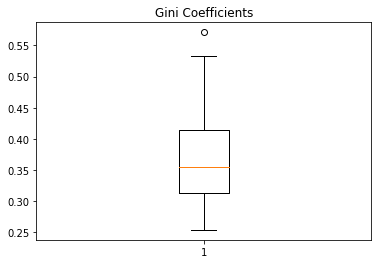

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
props = dict(markerfacecolor = 'red')
plt.boxplot(gini_values)
plt.title("Gini Coefficients")
plt.show()

In [14]:
equal = gini_index_2015.loc[(gini_index_2015["GINI index (World Bank estimate)"]<0.3125), :]
equal.count()

Country name                                         18
year                                                 18
Happiness Score                                      18
Log GDP per capita                                   18
Social support                                       18
Healthy life expectancy at birth                     18
Freedom to make life choices                         18
Generosity                                           18
Perceptions of corruption                            18
Positive affect                                      18
Democratic Quality                                   18
Delivery Quality                                     18
Standard deviation of ladder by country-year         18
Standard deviation/Mean of ladder by country-year    18
GINI index (World Bank estimate)                     18
Region                                               18
dtype: int64

In [15]:
unequal = gini_index_2015.loc[(gini_index_2015["GINI index (World Bank estimate)"]>0.41374999999999995), :]
unequal.count()

Country name                                         18
year                                                 18
Happiness Score                                      18
Log GDP per capita                                   18
Social support                                       18
Healthy life expectancy at birth                     18
Freedom to make life choices                         18
Generosity                                           18
Perceptions of corruption                            18
Positive affect                                      18
Democratic Quality                                   18
Delivery Quality                                     18
Standard deviation of ladder by country-year         18
Standard deviation/Mean of ladder by country-year    18
GINI index (World Bank estimate)                     18
Region                                               18
dtype: int64

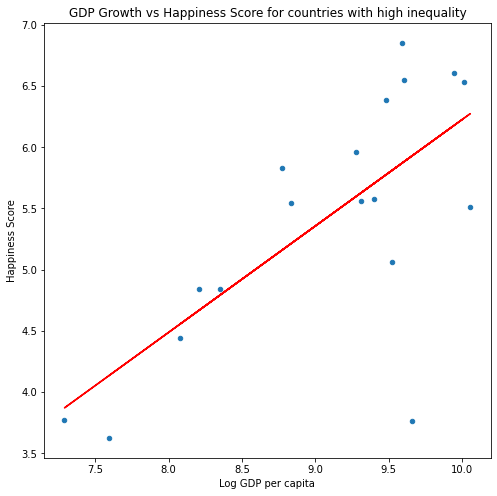

0.7069238390030298
0.0010365237749207807


In [41]:
# Scatter plot for GDP vs. Happiness

#use pandas to plot a scatter plot
unequal.plot(kind="scatter", x="Log GDP per capita", y="Happiness Score", grid=False, figsize=(8,8),
              title="GDP Growth vs Happiness Score for countries with high inequality")

#Calculate the correlation coefficient
happiness = unequal.iloc[:, 2]
gdp = unequal.iloc[:, 3]
correlation = st.pearsonr(gdp, happiness)

#Calculate  the linear regression, r squared 
slope, intercept, rvalue, pvalue, stderr = st.linregress(gdp, happiness)
regress_values = gdp * slope + intercept

plt.plot(gdp,regress_values,"r-")


# Saves an image of our chart so that we can view it in a folder
#plt.savefig("../Images/temp_lat.png")
plt.show()
print(rvalue)
print(pvalue)

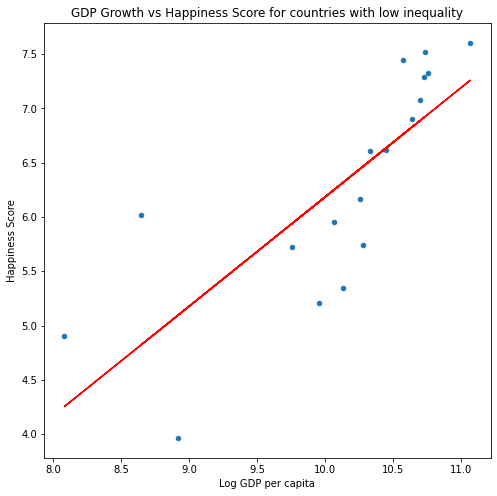

0.7843216387055076
0.00011661863136819835


In [18]:
# Scatter plot for GDP vs. Happiness

#use pandas to plot a scatter plot
equal.plot(kind="scatter", x="Log GDP per capita", y="Happiness Score", grid=False, figsize=(8,8),
              title="GDP Growth vs Happiness Score for countries with low inequality")

#Calculate the correlation coefficient
happiness = equal.iloc[:, 2]
gdp = equal.iloc[:, 3]
correlation = st.pearsonr(gdp, happiness)

#Calculate  the linear regression, r squared 
slope, intercept, rvalue, pvalue, stderr = st.linregress(gdp, happiness)
regress_values = gdp * slope + intercept

plt.plot(gdp,regress_values,"r-")

# Saves an image of our chart so that we can view it in a folder
#plt.savefig("../Images/temp_lat.png")
plt.show()
print(rvalue)
print(pvalue)

In [19]:
equal.mean()

year                                                 2015.000000
Happiness Score                                         6.299444
Log GDP per capita                                     10.114158
Social support                                          0.902184
Healthy life expectancy at birth                       68.644445
Freedom to make life choices                            0.782484
Generosity                                              0.056840
Perceptions of corruption                               0.646959
Positive affect                                         0.724620
Democratic Quality                                      0.603295
Delivery Quality                                        0.764709
Standard deviation of ladder by country-year            1.777431
Standard deviation/Mean of ladder by country-year       0.293756
GINI index (World Bank estimate)                        0.278333
dtype: float64

In [20]:
unequal.mean()

year                                                 2015.000000
Happiness Score                                         5.404142
Log GDP per capita                                      9.055190
Social support                                          0.793130
Healthy life expectancy at birth                       62.688889
Freedom to make life choices                            0.793363
Generosity                                             -0.049134
Perceptions of corruption                               0.805305
Positive affect                                         0.746518
Democratic Quality                                     -0.026220
Delivery Quality                                       -0.224817
Standard deviation of ladder by country-year            2.387642
Standard deviation/Mean of ladder by country-year       0.459477
GINI index (World Bank estimate)                        0.476611
dtype: float64

In [21]:
#Divde into 4 groups to see the relationship with happiness/ used 'mean' values for both indicators
group_1 = gini_index_2015.loc[(gini_index_2015["GINI index (World Bank estimate)"]< 0.338) & (gini_index_2015["Log GDP per capita"] < 9.27), :]
group_2 = gini_index_2015.loc[(gini_index_2015["GINI index (World Bank estimate)"]< 0.338) & (gini_index_2015["Log GDP per capita"] >= 9.27), :]
group_3 = gini_index_2015.loc[(gini_index_2015["GINI index (World Bank estimate)"]> 0.338) & (gini_index_2015["Log GDP per capita"] < 9.27), :]
group_4 = gini_index_2015.loc[(gini_index_2015["GINI index (World Bank estimate)"]> 0.338) & (gini_index_2015["Log GDP per capita"] > 9.27), :]

<BarContainer object of 4 artists>

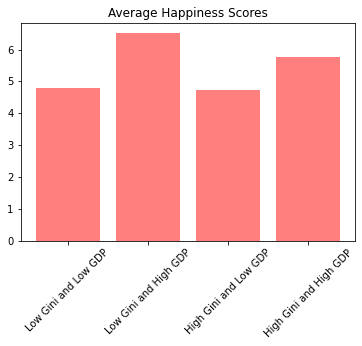

In [40]:
group_1_avg = group_1['Happiness Score'].mean()
group_2_avg = group_2['Happiness Score'].mean()
group_3_avg = group_3['Happiness Score'].mean()
group_4_avg = group_4['Happiness Score'].mean()

values = [group_1_avg, group_2_avg, group_3_avg, group_4_avg]
x_axis = np.arange(len(values))
width = 0

plt.title("Average Happiness Scores")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Low Gini and Low GDP", "Low Gini and High GDP", "High Gini and Low GDP", "High Gini and High GDP"])
plt.xticks(rotation = 45)
plt.xticks(x_axis + width / 2, ("Low Gini and Low GDP", "Low Gini and High GDP", "High Gini and Low GDP", "High Gini and High GDP"))

plt.bar(x_axis, values, color='r', alpha=0.5, align="center")